# Qualitative data analysis in theory and practice - Text Mining
<i>  Antoni Perużyński</i>

# Project 2

In [1]:
# import nltk
# #nltk.download('stopwords')
# #nltk.download('punkt')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

import re

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set_theme()
from tabulate import tabulate

from wordcloud import WordCloud


from PIL import Image

import sklearn as sk
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn import metrics, __all__
from sklearn.metrics import classification_report, confusion_matrix


In [2]:
def create_bow(text: list) -> list:
    word2count = {}
    for word in text:
        if word not in word2count.keys():
            word2count[word] = 1
        else:
            word2count[word] += 1
    return word2count

In [3]:
def stopwords_function(text: str) -> str:

    stop_words = stopwords.words('english')
    #word_token = word_tokenize(text)
    cleaned = [w for w in text if w not in stop_words]
    return " ".join(cleaned)

In [4]:
def stemming_function(text: str) -> list:
    stemming = PorterStemmer()
    txt_list = list(text.split(" "))
    stemmed_txt = []
    for w in txt_list:
        stemmed_txt.append(stemming.stem(w))
    return stemmed_txt

In [5]:
def clean_text(txt: str) -> str:
    find_emoticons = re.findall(r"[:;][-]?[/\|\)\(><D]", txt)
    txt_low = txt.lower()
    delete_numbers = re.sub("[0-9]+", "", txt_low)
    delete_html = re.sub(r'<.*?>', '', delete_numbers)
    delete_punctuation = re.sub(r"[^\w\s]", " ", delete_html)
    delete_whitespace = delete_punctuation.strip()
    clean_txt = delete_whitespace + ' '.join(find_emoticons)
    return clean_txt

In [6]:
def text_tokenizer(text: str):

    cleaned_text = clean_text(text)
    tokens = word_tokenize(cleaned_text)
    without_stopwords =stopwords_function(tokens)
    stemmed_text = stemming_function(without_stopwords)

    return [w for w in stemmed_text if len(w) > 3]

In [7]:
def vectorizing(sample):
    vectorizer1 = CountVectorizer(tokenizer=text_tokenizer)
    X_transform_sample = vectorizer1.fit_transform(sample)
    titles_sample = (vectorizer1.get_feature_names_out())
    array = X_transform_sample.toarray()
    return array, titles_sample

def vectorizing_voc(sample, vocabulary):
    vectorizer1 = CountVectorizer(tokenizer=text_tokenizer, vocabulary=vocabulary)
    X_transform_sample = vectorizer1.fit_transform(sample)
    titles_sample = (vectorizer1.get_feature_names_out())
    array = X_transform_sample.toarray()
    return array, titles_sample

### Top10 setA minus setB

Function used to take top 10 tokens which appear only in first set.

In [8]:
def Top10onlyInA(sample_A, sample_B, tit, jpg_name):
    vectorizer1 = CountVectorizer(tokenizer=text_tokenizer)

    X_transform_sample_true = vectorizer1.fit_transform(sample_A)
    titles_A = (vectorizer1.get_feature_names_out())

    X_transform_sample_fake = vectorizer1.fit_transform(sample_B)
    titles_B = (vectorizer1.get_feature_names_out())

    AwithoutB = [x for x in titles_A if x not in titles_B]

    vectorizer = CountVectorizer(tokenizer=text_tokenizer, vocabulary=AwithoutB)
    X_transform_sample = vectorizer.fit_transform(sample_A)

    titles = (vectorizer.get_feature_names_out())  
    array = X_transform_sample.toarray() 

    print("Display top 10 tokens")
    column_sum = np.sum(array, axis=0) 
    max_val_col = np.argpartition(column_sum, -10)[-10:]
    top_10_quantity = column_sum[max_val_col] 
    
    
    top_10_tokens = []
    for i in max_val_col:
        top_10_tokens.append(titles[i])
    

    df_1 = pd.DataFrame({'titles': top_10_tokens, 'quantity': top_10_quantity})
    df_1 = df_1.sort_values(by="quantity")
    plot = df_1.plot(kind='barh', x='titles', y='quantity',color='#833864', title=tit)
    fig = plot.get_figure()
    #fig.savefig(jpg_name+'.png')
    plt.show()
    df_1 = df_1.sort_values(by="quantity", ascending=False)
    print(tabulate(df_1, headers='keys', tablefmt='psql'))  

    return

### Top10_OneSet

Function used to take top 10 tokens in set.

In [9]:
def Top10_OneSet(sample, tit, jpg_name):
  
    vectorizer = CountVectorizer(tokenizer=text_tokenizer)
    X_transform_sample = vectorizer.fit_transform(sample)

    titles = (vectorizer.get_feature_names_out ())  
    array = X_transform_sample.toarray()

 
    print("Display top 10 tokens")
    column_sum = np.sum(array, axis=0)  
    max_val_col = np.argpartition(column_sum, -10)[-10:]  
    top_10_quantity = column_sum[max_val_col]
    
  
    top_10_tokens = []
    for i in max_val_col:
        top_10_tokens.append(titles[i])
 
    print(top_10_tokens)

    df_1 = pd.DataFrame({'titles': top_10_tokens, 'quantity': top_10_quantity})
    df_1 = df_1.sort_values(by = "quantity")
    plot = df_1.plot(kind = 'barh', x = 'titles', y = 'quantity', color = '#833864',
                     title = tit)
    fig = plot.get_figure()
    #fig.savefig(jpg_name+'.png')
    df_1 = df_1.sort_values(by = "quantity", ascending = False)
    plt.show()
    print(tabulate(df_1, headers='keys', tablefmt='psql')) 

    return

### Preprocessing and exploring

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv('amazon_alexa.tsv', sep='\t')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [13]:
df = df.drop(["date", "variation", "feedback"], axis=1)

In [14]:
#df["sentiment"] = df.rating.apply(lambda x: 0 if x in [1, 2] else 1) 
df["Positive"] = df["rating"] >= 5

In [15]:
df.head()

,rating,verified_reviews,Positive
0,5,Love my Echo!,True
1,5,Loved it!,True
2,4,"Sometimes while playing a game, you can answer...",False
3,5,I have had a lot of fun with this thing. My 4 ...,True
4,5,Music,True


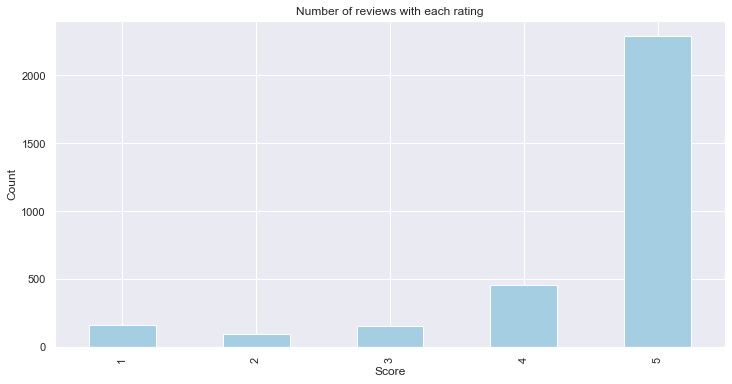

In [16]:
plt.figure(figsize=(12,6))
plt.title("Number of reviews with each rating")
colors = ['#833864','#bc5090','#c2619b','#c972a6','#d084b1','#d696bc','#dda7c7','#e4b9d2','#eacadd','#f1dce8']

df['rating'].value_counts().sort_index().plot.bar(colormap='Paired')
plt.xlabel("Score")
plt.ylabel("Count")
plt.show()

Here may appear the problem with later classification, because this dataset isn't balanced. We have much more opinions which are positive. 

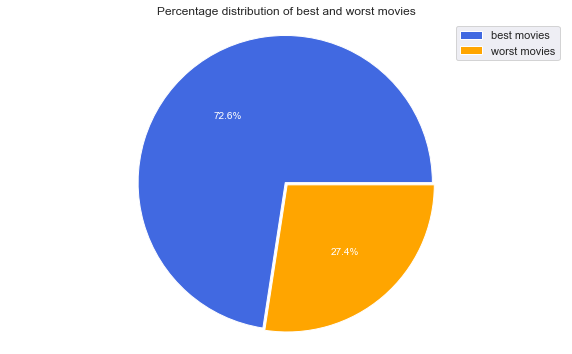

In [17]:
plt.figure(figsize=(10,6))
explode = (0.01,0.01)
plt.pie([len(df[df["Positive"] == True]),len(df[df["Positive"] == False])], colors=["RoyalBlue", "Orange"], labels=['best movies','worst movies'],autopct='%.1f%%', textprops={'color':"w"}, explode = explode)
plt.legend(loc='upper right')
plt.axis('equal')
plt.title("Percentage distribution of best and worst movies")
plt.show()

## Classifications

In [18]:
dataset_vector, dataset_opinions_1 = vectorizing(df['verified_reviews'])

### Dividing into training and testing set

In [19]:
X_train, X_test, y_train, y_test = train_test_split(df['verified_reviews'], df['Positive'], test_size=0.33,
                                                    random_state=42)

X_train_vector, X_train_rewievs = vectorizing_voc(X_train, dataset_opinions_1)
X_test_vector, X_test_rewievs = vectorizing_voc(X_test, dataset_opinions_1)

### Decision Tree Classifier

Accuracy DTC: 0.775


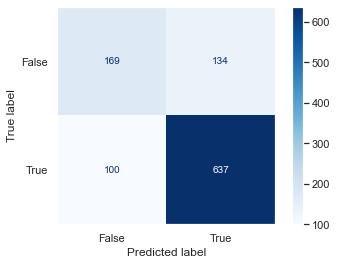

In [20]:
DTC = DecisionTreeClassifier()
DTC.fit(X_train_vector, y_train)
y_pred = DTC.predict(X_test_vector)
print("Accuracy DTC:", metrics.accuracy_score(y_test, y_pred))
#print("Accuracy another way:", DTC.score(X_test_vector, y_test))
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot(cmap = 'Blues')
plt.grid(False)
plt.show()

In [21]:
print(f'DTC model \n {classification_report(y_test, y_pred)}')

DTC model 
               precision    recall  f1-score   support

       False       0.63      0.56      0.59       303
        True       0.83      0.86      0.84       737

    accuracy                           0.78      1040
   macro avg       0.73      0.71      0.72      1040
weighted avg       0.77      0.78      0.77      1040



### K-Neighbors Classifier

Accuracy KNN: 0.75


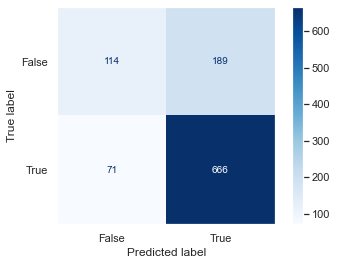

In [22]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train_vector, y_train)
y_pred = classifier.predict(X_test_vector)

print("Accuracy KNN:", metrics.accuracy_score(y_test, y_pred))
#print("Accuracy another way:", classifier.score(X_test_vector, y_test))

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot(cmap = 'Blues')
plt.grid(False)
plt.show()

In [23]:
print(f'KNN model \n {classification_report(y_test, y_pred)}')

KNN model 
               precision    recall  f1-score   support

       False       0.62      0.38      0.47       303
        True       0.78      0.90      0.84       737

    accuracy                           0.75      1040
   macro avg       0.70      0.64      0.65      1040
weighted avg       0.73      0.75      0.73      1040



### Neural network Classfier

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


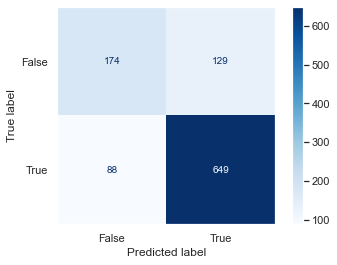

In [24]:
NN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
NN.fit(X_train_vector, y_train)
y_pred=NN.predict(X_test_vector)
round(NN.score(X_test_vector,y_test), 4)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot(cmap = 'Blues')
plt.grid(False)
plt.show()

In [25]:
print(f'NN model \n {classification_report(y_test, y_pred)}')

NN model 
               precision    recall  f1-score   support

       False       0.66      0.57      0.62       303
        True       0.83      0.88      0.86       737

    accuracy                           0.79      1040
   macro avg       0.75      0.73      0.74      1040
weighted avg       0.78      0.79      0.79      1040



### Random Forest Classifier

Accuracy RFC: 0.8163461538461538


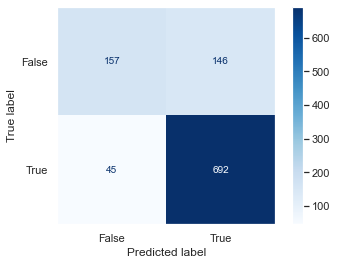

In [26]:
RFC = RandomForestClassifier()
RFC.fit(X_train_vector, y_train)
y_pred = RFC.predict(X_test_vector)
print("Accuracy RFC:", metrics.accuracy_score(y_test, y_pred))
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot(cmap = 'Blues')
plt.grid(False)
plt.show()

In [27]:
print(f'RFC model \n {classification_report(y_test, y_pred)}')

RFC model 
               precision    recall  f1-score   support

       False       0.78      0.52      0.62       303
        True       0.83      0.94      0.88       737

    accuracy                           0.82      1040
   macro avg       0.80      0.73      0.75      1040
weighted avg       0.81      0.82      0.80      1040

